# 5장 선형회귀 자전거 통행량 예측 예제


In [145]:
import pandas as pd

# index_col= 'Date' 인것을 파이썬 시간으로  --> parse_dates = True , 리눅스 시간을 파이썬 시간으로!!
counts = pd.read_csv('data/FremontBridge.csv', index_col='Date', parse_dates=True) 


# index_col= 'DATE' 인것을 파이썬 시간으로  --> parse_dates = True , 리눅스 시간을 파이썬 시간으로!!

weather = pd.read_csv('data/BicycleWeather.csv', index_col='DATE', parse_dates=True)

In [146]:
counts.head()


,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2012-10-03 00:00:00,13.0,4.0,9.0
2012-10-03 01:00:00,10.0,4.0,6.0
2012-10-03 02:00:00,2.0,1.0,1.0
2012-10-03 03:00:00,5.0,2.0,3.0
2012-10-03 04:00:00,7.0,6.0,1.0


In [147]:
weather.head()

,STATION,STATION_NAME,PRCP,SNWD,SNOW,TMAX,TMIN,AWND,WDF2,WDF5,...,WT17,WT05,WT02,WT22,WT04,WT13,WT16,WT08,WT18,WT03
DATE,,,,,,,,,,,,,,,,,,,,,
2012-01-01,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,0,0,0,128,50,47,100,90,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999
2012-01-02,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,109,0,0,106,28,45,180,200,...,-9999,-9999,-9999,-9999,-9999,1,1,-9999,-9999,-9999
2012-01-03,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,8,0,0,117,72,23,180,170,...,-9999,-9999,-9999,-9999,-9999,-9999,1,-9999,-9999,-9999
2012-01-04,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,203,0,0,122,56,47,180,190,...,-9999,-9999,-9999,-9999,-9999,1,1,-9999,-9999,-9999
2012-01-05,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,13,0,0,89,28,61,200,220,...,-9999,-9999,-9999,-9999,-9999,-9999,1,-9999,-9999,-9999


In [148]:
daily = counts.resample('d').sum()  #!!! data에서 col에서 day 기준으로 총합 계산!! 인덱스가 생기는구나
daily

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2012-10-03,3521.0,1760.0,1761.0
2012-10-04,3475.0,1708.0,1767.0
2012-10-05,3148.0,1558.0,1590.0
2012-10-06,2006.0,1080.0,926.0
2012-10-07,2142.0,1191.0,951.0
...,...,...,...
2020-01-27,3163.0,1058.0,2105.0
2020-01-28,2729.0,908.0,1821.0
2020-01-29,2832.0,938.0,1894.0


In [149]:
daily = counts.resample('M').sum()  #!!! data에서 col에서 달 기준으로 총합 계산!!
daily

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2012-10-31,65695.0,33764.0,31931.0
2012-11-30,50647.0,26062.0,24585.0
2012-12-31,36369.0,18608.0,17761.0
2013-01-31,44884.0,22910.0,21974.0
2013-02-28,50027.0,25898.0,24129.0
...,...,...,...
2019-09-30,112174.0,41449.0,70725.0
2019-10-31,104498.0,37109.0,67389.0
2019-11-30,84963.0,29744.0,55219.0


In [150]:
daily = counts.resample('y').sum()  #!!! data에서 col에서 년 기준으로 총합 계산!!
daily

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2012-12-31,152711.0,78434.0,74277.0
2013-12-31,928279.0,478991.0,449288.0
2014-12-31,1006196.0,515326.0,490870.0
2015-12-31,986556.0,500915.0,485641.0
2016-12-31,982470.0,468304.0,514166.0
2017-12-31,963135.0,412505.0,550630.0
2018-12-31,1051880.0,425655.0,626225.0
2019-12-31,1187146.0,449854.0,737292.0
2020-12-31,58986.0,20282.0,38704.0


In [151]:
daily = counts.resample('d').sum()  #!!! data에서 col에서 년 기준으로 총합 계산!!
daily

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2012-10-03,3521.0,1760.0,1761.0
2012-10-04,3475.0,1708.0,1767.0
2012-10-05,3148.0,1558.0,1590.0
2012-10-06,2006.0,1080.0,926.0
2012-10-07,2142.0,1191.0,951.0
...,...,...,...
2020-01-27,3163.0,1058.0,2105.0
2020-01-28,2729.0,908.0,1821.0
2020-01-29,2832.0,938.0,1894.0


In [152]:
daily['Total'] = daily.sum(axis=1) 

In [153]:
daily

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk,Total
Date,,,,
2012-10-03,3521.0,1760.0,1761.0,7042.0
2012-10-04,3475.0,1708.0,1767.0,6950.0
2012-10-05,3148.0,1558.0,1590.0,6296.0
2012-10-06,2006.0,1080.0,926.0,4012.0
2012-10-07,2142.0,1191.0,951.0,4284.0
...,...,...,...,...
2020-01-27,3163.0,1058.0,2105.0,6326.0
2020-01-28,2729.0,908.0,1821.0,5458.0
2020-01-29,2832.0,938.0,1894.0,5664.0


In [154]:
daily= daily[['Total']] # 다른 칼럼 제거
daily

,Total
Date,
2012-10-03,7042.0
2012-10-04,6950.0
2012-10-05,6296.0
2012-10-06,4012.0
2012-10-07,4284.0
...,...
2020-01-27,6326.0
2020-01-28,5458.0
2020-01-29,5664.0


우리는 이전에 사용 패턴이 일반적으로 하루하루 다르다는 것을 알았다. 이것을 우리의 데이터에서 요일을 나타내는 이진 열을 추가하여 설명하자.

In [155]:
days = ['Mon','Tue', "Wed", "Thu", "Fri", "Sat","Sun"]

for i in range(7):
    daily[days[i]] = (daily.index.dayofweek == i).astype(float)  ## !!! 해당 날짜 요일이 무슨요일인지 같으면  1 을 할당
    print(daily[days[i]])
    print()
    
    # daily.index.dayofweek
    # daily 데이터 프레임 인덱스 즉

Date
2012-10-03    0.0
2012-10-04    0.0
2012-10-05    0.0
2012-10-06    0.0
2012-10-07    0.0
             ... 
2020-01-27    1.0
2020-01-28    0.0
2020-01-29    0.0
2020-01-30    0.0
2020-01-31    0.0
Freq: D, Name: Mon, Length: 2677, dtype: float64

Date
2012-10-03    0.0
2012-10-04    0.0
2012-10-05    0.0
2012-10-06    0.0
2012-10-07    0.0
             ... 
2020-01-27    0.0
2020-01-28    1.0
2020-01-29    0.0
2020-01-30    0.0
2020-01-31    0.0
Freq: D, Name: Tue, Length: 2677, dtype: float64

Date
2012-10-03    1.0
2012-10-04    0.0
2012-10-05    0.0
2012-10-06    0.0
2012-10-07    0.0
             ... 
2020-01-27    0.0
2020-01-28    0.0
2020-01-29    1.0
2020-01-30    0.0
2020-01-31    0.0
Freq: D, Name: Wed, Length: 2677, dtype: float64

Date
2012-10-03    0.0
2012-10-04    1.0
2012-10-05    0.0
2012-10-06    0.0
2012-10-07    0.0
             ... 
2020-01-27    0.0
2020-01-28    0.0
2020-01-29    0.0
2020-01-30    1.0
2020-01-31    0.0
Freq: D, Name: Thu, Length: 2677, dtyp

C:\Users\admin\AppData\Local\conda\conda\envs\bk\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [156]:
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
for i in range(7):
    daily[days[i]] = (daily.index.dayofweek == i).astype(float)

In [157]:
daily

,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun
Date,,,,,,,,
2012-10-03,7042.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2012-10-04,6950.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2012-10-05,6296.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2012-10-06,4012.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2012-10-07,4284.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
2020-01-27,6326.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-28,5458.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2020-01-29,5664.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [158]:
#daily =daily['Total']

In [125]:
#daily.head()

In [126]:
#daily =daily[['Total']]
#daily.columns

Index(['Total'], dtype='object')

In [127]:
#daily

,Total
Date,
2012-10-03,7042.0
2012-10-04,6950.0
2012-10-05,6296.0
2012-10-06,4012.0
2012-10-07,4284.0
...,...
2020-01-27,6326.0
2020-01-28,5458.0
2020-01-29,5664.0


마찬가지로 휴일에 자전거를 타는 사람들은 다르게 행동하리라 예상가능 이에 대한 표시자도 추가

In [159]:
from pandas.tseries.holiday import USFederalHolidayCalendar
cal = USFederalHolidayCalendar()
cal

In [160]:
holidays = cal.holidays('2012','2016') # 2012년 부터 2016 이전까지 미국 공휴일?

In [161]:
holidays

DatetimeIndex(['2012-01-02', '2012-01-16', '2012-02-20', '2012-05-28',
               '2012-07-04', '2012-09-03', '2012-10-08', '2012-11-12',
               '2012-11-22', '2012-12-25', '2013-01-01', '2013-01-21',
               '2013-02-18', '2013-05-27', '2013-07-04', '2013-09-02',
               '2013-10-14', '2013-11-11', '2013-11-28', '2013-12-25',
               '2014-01-01', '2014-01-20', '2014-02-17', '2014-05-26',
               '2014-07-04', '2014-09-01', '2014-10-13', '2014-11-11',
               '2014-11-27', '2014-12-25', '2015-01-01', '2015-01-19',
               '2015-02-16', '2015-05-25', '2015-07-03', '2015-09-07',
               '2015-10-12', '2015-11-11', '2015-11-26', '2015-12-25',
               '2016-01-01'],
              dtype='datetime64[ns]', freq=None)

In [162]:
daily = daily.join(pd.Series(1, index=holidays, name='holiday'))

In [163]:
daily

,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday
Date,,,,,,,,,
2012-10-03,7042.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN
2012-10-04,6950.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN
2012-10-05,6296.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN
2012-10-06,4012.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN
2012-10-07,4284.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...
2020-01-27,6326.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2020-01-28,5458.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN
2020-01-29,5664.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN


In [164]:
daily.shape

(2677, 9)

In [165]:
counts.shape

(64248, 3)

In [166]:
daily['holiday'].fillna(0, inplace=True)
daily

,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday
Date,,,,,,,,,
2012-10-03,7042.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2012-10-04,6950.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2012-10-05,6296.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2012-10-06,4012.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2012-10-07,4284.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
2020-01-27,6326.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-28,5458.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-29,5664.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


또 일조시간이 자전거를 타는 사람 수에 영향을 미칠 수 있다고 생각할 수 있음. 표준 천문학 계산을 사용.

C:\Users\admin\AppData\Local\conda\conda\envs\bk\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  


(8, 17)

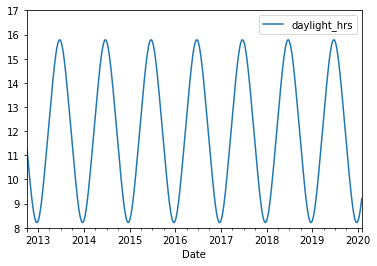

In [167]:
import numpy as np
import matplotlib.pyplot as plt

def hours_of_daylight(date, axis=23.44, latitude=47.61):
    """해당날짜의 일조시간을 계산"""
    days = (date - pd.datetime(2000, 12, 21)).days
    m = (1. - np.tan(np.radians(latitude))
         * np.tan(np.radians(axis) * np.cos(days * 2 * np.pi / 365.25)))
    return 24. * np.degrees(np.arccos(1 - np.clip(m, 0, 2))) / 180.

daily['daylight_hrs'] = list(map(hours_of_daylight, daily.index))
daily[['daylight_hrs']].plot()
plt.ylim(8, 17)

In [168]:
daily

,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday,daylight_hrs
Date,,,,,,,,,,
2012-10-03,7042.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,11.277359
2012-10-04,6950.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11.219142
2012-10-05,6296.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,11.161038
2012-10-06,4012.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,11.103056
2012-10-07,4284.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,11.045208
...,...,...,...,...,...,...,...,...,...,...
2020-01-27,6326.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.040131
2020-01-28,5458.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,9.082085
2020-01-29,5664.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,9.124801


아울러 데이터에 평균 기온과 전체 강수량을 추가할 수 있음. 인치 단위의 강수량과 더불어 날이 건조했는지(즉, 강수량이 0이었는지) 알려주는 플래그도 추가

In [169]:
weather.head()


,STATION,STATION_NAME,PRCP,SNWD,SNOW,TMAX,TMIN,AWND,WDF2,WDF5,...,WT17,WT05,WT02,WT22,WT04,WT13,WT16,WT08,WT18,WT03
DATE,,,,,,,,,,,,,,,,,,,,,
2012-01-01,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,0,0,0,128,50,47,100,90,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999
2012-01-02,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,109,0,0,106,28,45,180,200,...,-9999,-9999,-9999,-9999,-9999,1,1,-9999,-9999,-9999
2012-01-03,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,8,0,0,117,72,23,180,170,...,-9999,-9999,-9999,-9999,-9999,-9999,1,-9999,-9999,-9999
2012-01-04,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,203,0,0,122,56,47,180,190,...,-9999,-9999,-9999,-9999,-9999,1,1,-9999,-9999,-9999
2012-01-05,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,13,0,0,89,28,61,200,220,...,-9999,-9999,-9999,-9999,-9999,-9999,1,-9999,-9999,-9999


In [170]:
# temperatures are in 1/10 deg C; convert to C
weather['TMIN'] /= 10
weather['TMAX'] /= 10
weather['Temp (C)'] = 0.5 * (weather['TMIN'] + weather['TMAX'])

# precip is in 1/10 mm; convert to inches
weather['PRCP'] /= 254
weather['dry day'] = (weather['PRCP'] == 0).astype(int)

daily = daily.join(weather[['PRCP', 'Temp (C)', 'dry day']])

마지막으로 첫 날부터 증가하는 계수기를 추가해 몇 해가 지났는지를 측정. 이를 이용해 관측된 일 별 통행량이 연도별로 증가하거나 감소하는지 측정.

In [171]:
daily['annual'] = (daily.index - daily.index[0]).days / 365.

In [172]:
daily

,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday,daylight_hrs,PRCP,Temp (C),dry day,annual
Date,,,,,,,,,,,,,,
2012-10-03,7042.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,11.277359,0.0,13.35,1.0,0.000000
2012-10-04,6950.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11.219142,0.0,13.60,1.0,0.002740
2012-10-05,6296.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,11.161038,0.0,15.30,1.0,0.005479
2012-10-06,4012.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,11.103056,0.0,15.85,1.0,0.008219
2012-10-07,4284.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,11.045208,0.0,15.85,1.0,0.010959
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-27,6326.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.040131,NaN,NaN,NaN,7.320548
2020-01-28,5458.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,9.082085,NaN,NaN,NaN,7.323288
2020-01-29,5664.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,9.124801,NaN,NaN,NaN,7.326027


In [173]:
weather

,STATION,STATION_NAME,PRCP,SNWD,SNOW,TMAX,TMIN,AWND,WDF2,WDF5,...,WT02,WT22,WT04,WT13,WT16,WT08,WT18,WT03,Temp (C),dry day
DATE,,,,,,,,,,,,,,,,,,,,,
2012-01-01,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,0.000000,0,0,12.8,5.0,47,100,90,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,8.90,1
2012-01-02,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,0.429134,0,0,10.6,2.8,45,180,200,...,-9999,-9999,-9999,1,1,-9999,-9999,-9999,6.70,0
2012-01-03,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,0.031496,0,0,11.7,7.2,23,180,170,...,-9999,-9999,-9999,-9999,1,-9999,-9999,-9999,9.45,0
2012-01-04,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,0.799213,0,0,12.2,5.6,47,180,190,...,-9999,-9999,-9999,1,1,-9999,-9999,-9999,8.90,0
2012-01-05,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,0.051181,0,0,8.9,2.8,61,200,220,...,-9999,-9999,-9999,-9999,1,-9999,-9999,-9999,5.85,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-08-28,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,0.019685,0,0,23.3,15.6,26,230,240,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,19.45,0
2015-08-29,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,1.279528,0,0,22.2,13.3,58,210,210,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,17.75,0
2015-08-30,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,0.401575,0,0,20.0,12.8,47,200,200,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,16.40,0


In [174]:
counts

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2012-10-03 00:00:00,13.0,4.0,9.0
2012-10-03 01:00:00,10.0,4.0,6.0
2012-10-03 02:00:00,2.0,1.0,1.0
2012-10-03 03:00:00,5.0,2.0,3.0
2012-10-03 04:00:00,7.0,6.0,1.0
...,...,...,...
2020-01-31 19:00:00,64.0,12.0,52.0
2020-01-31 20:00:00,42.0,7.0,35.0
2020-01-31 21:00:00,20.0,2.0,18.0


## 중요

이 데이터가 준비되면 사용할 열을 선택해서 선형 회귀 모델을 데이터에 적합할 수 있다. 요일 플래그는 근본적으로 해당 요일에 특화된 절편으로(시계열 데이터이므로) 동작하기 때문에 fit_intercept = False로 설정!!!

In [176]:
# 널 값을 갖는 행은 모두 제거
from sklearn.linear_model import LinearRegression

daily.dropna(axis=0, how='any', inplace=True)

column_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun', 'holiday',
                'daylight_hrs', 'PRCP', 'dry day', 'Temp (C)', 'annual']
X = daily[column_names]
y = daily['Total']

model = LinearRegression(fit_intercept=False)
model.fit(X, y)
daily['predicted'] = model.predict(X)

In [178]:
daily # 'predicted' 는 그날의 예측량 자전거 보행

,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday,daylight_hrs,PRCP,Temp (C),dry day,annual,predicted
Date,,,,,,,,,,,,,,,
2012-10-03,7042.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,11.277359,0.000000,13.35,1.0,0.000000,6926.800551
2012-10-04,6950.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11.219142,0.000000,13.60,1.0,0.002740,6723.895662
2012-10-05,6296.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,11.161038,0.000000,15.30,1.0,0.005479,6321.867646
2012-10-06,4012.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,11.103056,0.000000,15.85,1.0,0.008219,3816.188349
2012-10-07,4284.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,11.045208,0.000000,15.85,1.0,0.010959,3740.897233
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-08-28,5306.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,13.418591,0.019685,19.45,0.0,2.901370,6478.971788
2015-08-29,1398.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,13.362212,1.279528,17.75,0.0,2.904110,2005.298090
2015-08-30,2426.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,13.305611,0.401575,16.40,0.0,2.906849,2921.776213


Text(0, 0.5, 'people')

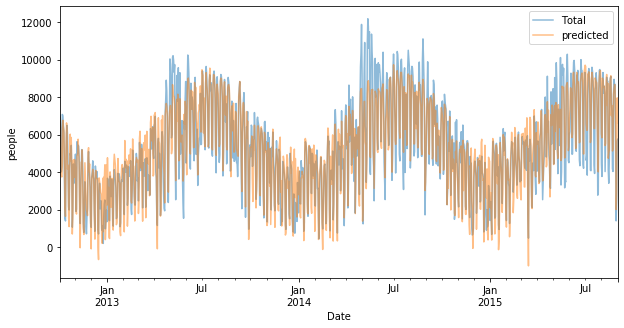

In [188]:
# 시각화

daily[['Total', 'predicted']].plot(alpha=0.5,figsize=(10,5))
plt.ylabel('people')

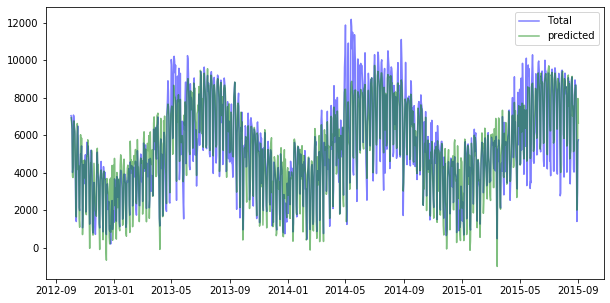

In [206]:
plt.figure(figsize=(10,5))
plt.plot(daily.index, daily['Total'], 'b', alpha=0.5,label='Total')
plt.plot(daily.index, daily['predicted'], 'g', alpha=0.5, label='predicted')
plt.legend(loc='best')
plt.show()

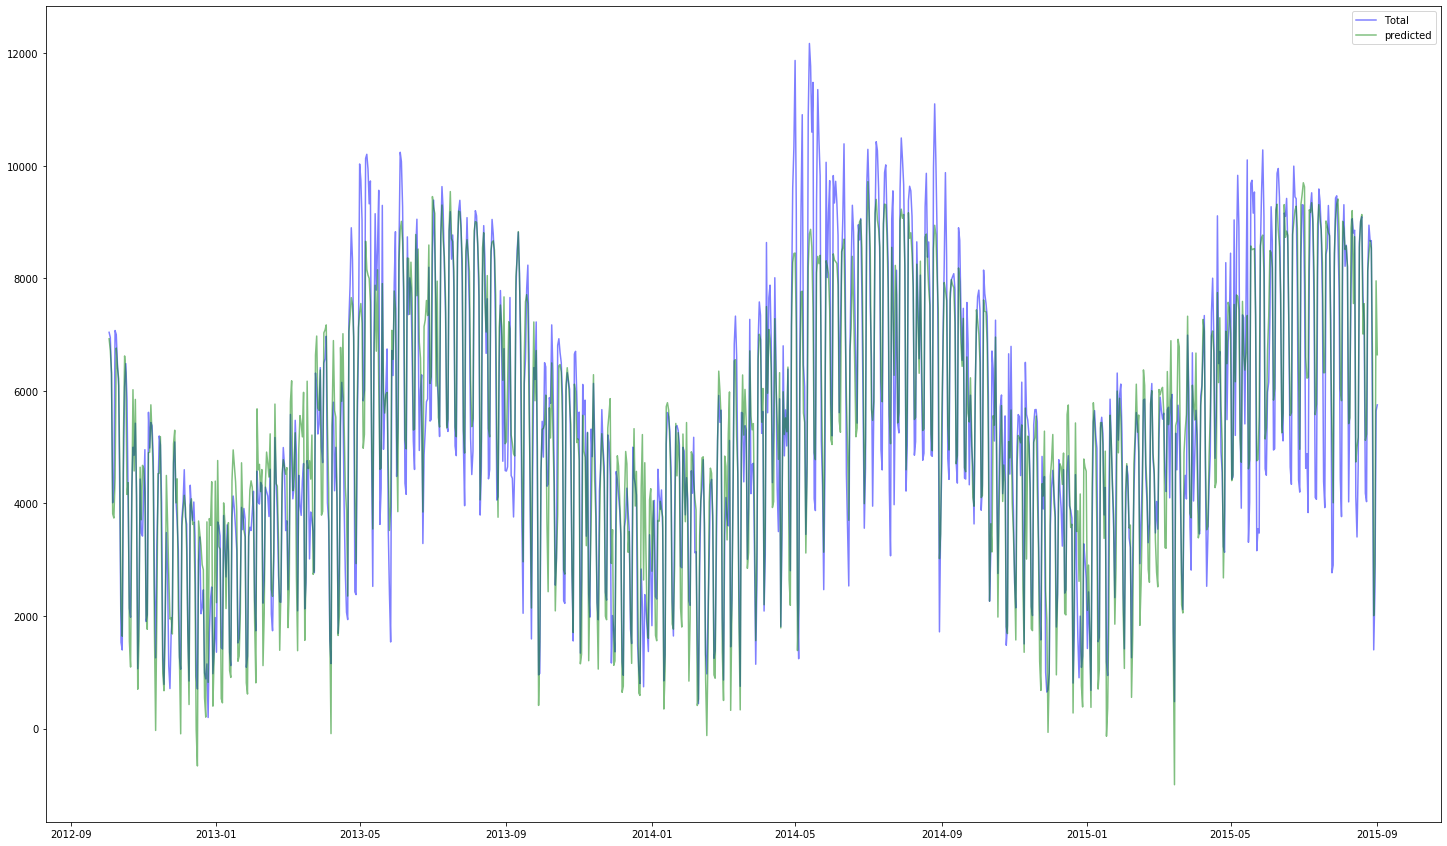

In [207]:
plt.figure(figsize=(25,15))
plt.plot(daily.index, daily['Total'], 'b', alpha=0.5,label='Total')
plt.plot(daily.index, daily['predicted'], 'g', alpha=0.5, label='predicted')
plt.legend(loc='best')
plt.show()

In [203]:
params = pd.Series(model.coef_, index=X.columns)
params

Mon             1009.765512
Tue             1220.467872
Wed             1185.347283
Thu              964.716230
Fri              355.960691
Sat            -2206.603421
Sun            -2267.134492
holiday        -2374.802762
daylight_hrs     257.703022
PRCP           -1329.669764
dry day         1095.397185
Temp (C)         130.325582
annual            53.885426
dtype: float64

이 수치는 불확실성에 대한 척도 없이는 해석하기 어렵다. 데이터의 부트스트랩 표본 재추출을 사용하면 이 불확실성을 신속히 계산할 수 있다.

In [209]:
from sklearn.utils import resample
np.random.seed(1)
err = np.std( [model.fit(*resample(X, y) ).coef_ for i in range(1000)], 0)
err # z칼럼 13개 

array([172.50937866, 166.29439033, 165.70155707, 170.33914851,
       162.08337046, 159.17040366, 166.06225119, 326.3901616 ,
        18.05746198, 124.69246498,  66.48731753,   7.20489407,
        35.37089666])

In [205]:
print(pd.DataFrame({'effect': params.round(0), # round 는 반올림.
                    'error': err.round(0)}))

              effect  error
Mon           1010.0  173.0
Tue           1220.0  166.0
Wed           1185.0  166.0
Thu            965.0  170.0
Fri            356.0  162.0
Sat          -2207.0  159.0
Sun          -2267.0  166.0
holiday      -2375.0  326.0
daylight_hrs   258.0   18.0
PRCP         -1330.0  125.0
dry day       1095.0   66.0
Temp (C)       130.0    7.0
annual          54.0   35.0


# 심화 학습:서포트 벡터 머신 

서포트 벡터 머신은 분류와 회귀 분석에 모두 사용할 수 있는 특히 강력하고 유연한 지도 학습 알고리즘. 

In [211]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# use seaborn plotting defaults
import seaborn as sns; sns.set()

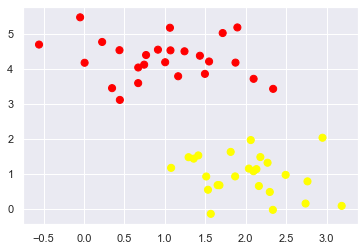

In [219]:
from sklearn.datasets import make_blobs
X, Y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

In [220]:
X

array([[ 1.41281595,  1.5303347 ],
       [ 1.81336135,  1.6311307 ],
       [ 1.43289271,  4.37679234],
       [ 1.87271752,  4.18069237],
       [ 2.09517785,  1.0791468 ],
       [ 2.73890793,  0.15676817],
       [ 3.18515794,  0.08900822],
       [ 2.06156753,  1.96918596],
       [ 2.03835818,  1.15466278],
       [-0.04749204,  5.47425256],
       [ 1.71444449,  5.02521524],
       [ 0.22459286,  4.77028154],
       [ 1.06923853,  4.53068484],
       [ 1.53278923,  0.55035386],
       [ 1.4949318 ,  3.85848832],
       [ 1.1641107 ,  3.79132988],
       [ 0.74387399,  4.12240568],
       [ 2.29667251,  0.48677761],
       [ 0.44359863,  3.11530945],
       [ 0.91433877,  4.55014643],
       [ 1.67467427,  0.68001896],
       [ 2.26908736,  1.32160756],
       [ 1.5108885 ,  0.9288309 ],
       [ 1.65179125,  0.68193176],
       [ 2.49272186,  0.97505341],
       [ 2.33812285,  3.43116792],
       [ 0.67047877,  4.04094275],
       [-0.55552381,  4.69595848],
       [ 2.16172321,

In [216]:
Y

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0])

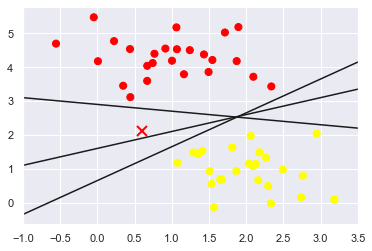

In [221]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5);

### 서포트 벡터 머신: 마진 최대화

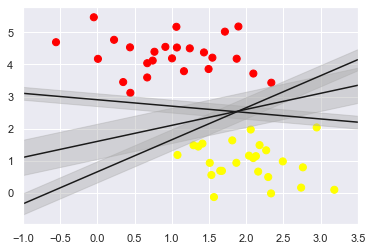

In [222]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5);

### 서포트 벡터 머신 적합하기

이 데이터에 실제로 맞는 결과를 봅시다: 우리는 이 데이터에 대한 SVM 모델을 교육하기 위해 Scikit-Learn의 지원 벡터 분류기를 사용할 것이다. 당분간은 선형 커널을 사용하고 C 파라미터를 매우 큰 수로 설정할 것이다(이것들의 의미를 좀 더 심도 있게 논의하겠다).

In [225]:
from sklearn.svm import SVC # 서포트 벡터 분류기

model = SVC (kernel='linear', C=1E10)
model.fit(X,Y)

SVC(C=10000000000.0, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma='scale',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

여기서 발생하는 상황을 보다 정확하게 시각화하기 위해 SVM 의사결정 경계를 표시하는 빠른 편의 기능을 만들어 봅시다.

In [ ]:
def plot_svc_decision_function(model, ax=None, plot_support= True):
    ''' 2차원 svc를 위한 의사결정 함수 플로팅하기'''
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # 모델 평가를 위한 그리드 생성
    x = np.linsapce(xlim[0],xlim[1], 30)
    y = np.linspace(ylim[0],ylim[1],30)
    
    Y,x= np.meshgrid(y,x)
    xy =np.vstack([X.ravel(), Y.ravel()]).T

In [231]:
X.ravel()

array([ 1.41281595,  1.5303347 ,  1.81336135,  1.6311307 ,  1.43289271,
        4.37679234,  1.87271752,  4.18069237,  2.09517785,  1.0791468 ,
        2.73890793,  0.15676817,  3.18515794,  0.08900822,  2.06156753,
        1.96918596,  2.03835818,  1.15466278, -0.04749204,  5.47425256,
        1.71444449,  5.02521524,  0.22459286,  4.77028154,  1.06923853,
        4.53068484,  1.53278923,  0.55035386,  1.4949318 ,  3.85848832,
        1.1641107 ,  3.79132988,  0.74387399,  4.12240568,  2.29667251,
        0.48677761,  0.44359863,  3.11530945,  0.91433877,  4.55014643,
        1.67467427,  0.68001896,  2.26908736,  1.32160756,  1.5108885 ,
        0.9288309 ,  1.65179125,  0.68193176,  2.49272186,  0.97505341,
        2.33812285,  3.43116792,  0.67047877,  4.04094275, -0.55552381,
        4.69595848,  2.16172321,  0.6565951 ,  2.09680487,  3.7174206 ,
        2.18023251,  1.48364708,  0.43899014,  4.53592883,  1.24258802,
        4.50399192,  0.00793137,  4.17614316,  1.89593761,  5.18

In [232]:
Y.ravel()

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0])

In [236]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

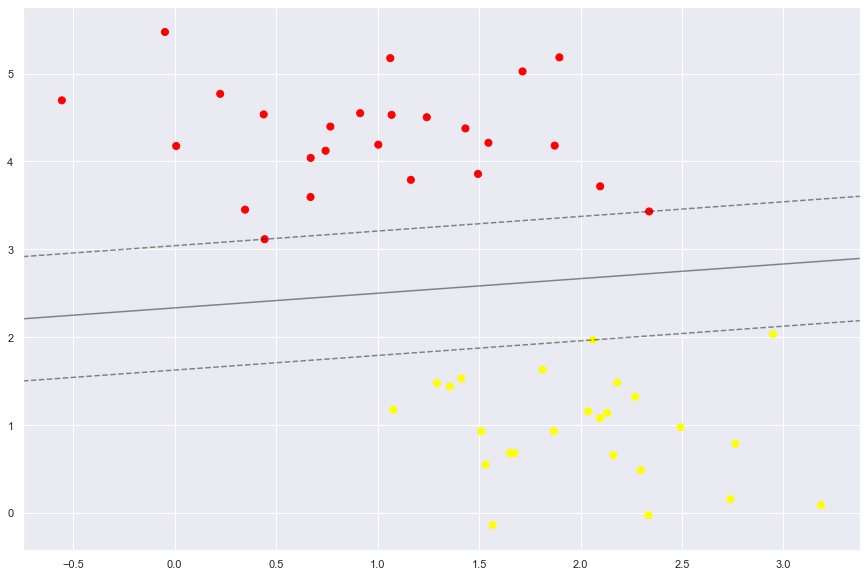

In [239]:
plt.figure(figsize=(15,10))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)

이것은 두 점의 차이를 최대화하는 경계선이다. 훈련 지점 중 몇몇이 여백에 닿아 있다는 것을 주목하십시오. 이 그림에서 검은 원들에 의해 표시된다. 이 점들은 이 적합성의 핵심 요소로서, 지원 벡터로 알려져 있으며, 알고리즘의 이름을 제공한다. Scikit-Learn에서 이러한 포인트의 ID는 분류기의 support_vectors_ 속성에 저장된다.

In [240]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

이 분류기의 성공 비결은 적합치의 경우 지지 벡터의 위치만 중요하며, 정확한 쪽에 있는 여백에서 더 멀리 떨어진 점은 적합치를 수정하지 않는다는 것이다! 기술적으로 이는 이러한 점들이 모형에 맞는 손실 함수에 기여하지 않기 때문에 그 위치와 숫자는 여백을 넘지 않는 한 중요하지 않기 때문이다.

예를 들어, 이 데이터 세트의 처음 60 포인트와 처음 120 포인트에서 학습한 모델을 플롯하면 다음과 같은 것을 알 수 있다.

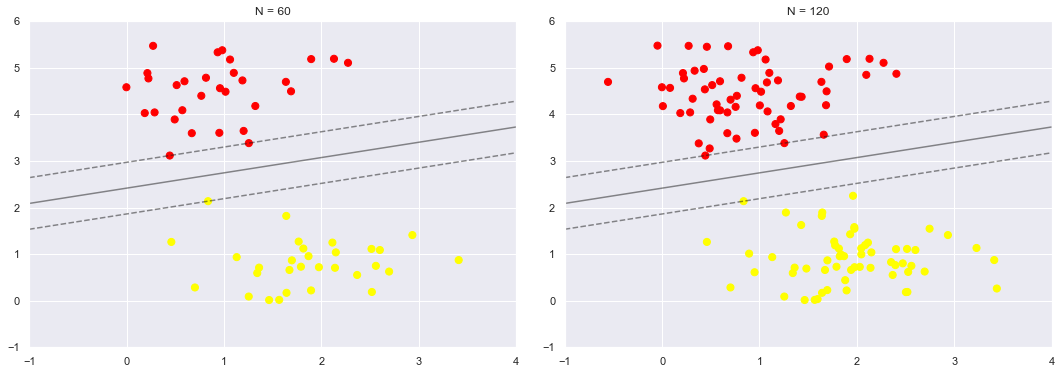

In [244]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))


왼쪽 패널에서, 우리는 모델과 60실습 점수에 대한 지지 벡터를 참조하십시오. 우측 패널에서, 우리는이지만, 이 모델:왼쪽 패널 3명 지원 요인이 올바른 패널들은 여전히 지원이어야 한다 변하지 않은 실습 점수의 수는 두배로 늘어났다. 먼 지점의 정확한 행동에 이 무감각은 SVM 모델들의 장점 중.

만약 생방송으로 이 노트를 실행하는 경우과 상호 작용하며 SVM 모델은 이 기능을 볼:IPython의 상호 작용의 위젯들을 사용할 수 있다.

In [242]:
from ipywidgets import interact, fixed
interact(plot_svm, N=[10, 200], ax=fixed(None))

interactive(children=(Dropdown(description='N', options=(10, 200), value=10), Output()), _dom_classes=('widget…

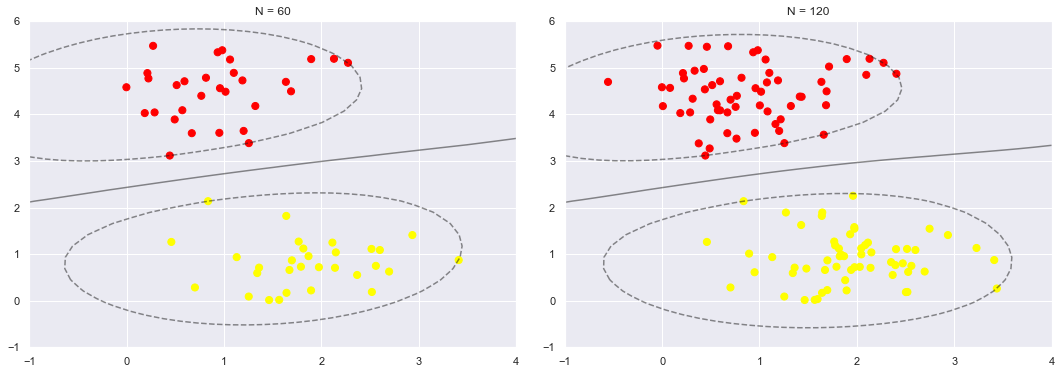

In [245]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='rbf', C=1E10)
    model.fit(X, y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

In [250]:
from ipywidgets import interact, fixed
interact(plot_svm, N=[10, 200], ax=fixed(None))

interactive(children=(Dropdown(description='N', options=(10, 200), value=10), Output()), _dom_classes=('widget…

<function __main__.plot_svm(N=10, ax=None)>

## 선형 경계 넘어: 커널 SVM

SVM은 커널과 결합할 때 매우 강력해진다. 우리는 이전에 깊이: 선형 회귀의 기본 함수 퇴행에서 커널의 버전을 본 적이 있다. 거기서 우리는 다항식 및 가우스 기본 함수에 의해 정의된 고차원 공간에 우리의 데이터를 투사했고, 따라서 선형 분류기와 비선형 관계에 적합할 수 있었다.

SVM 모델에서, 우리는 같은 생각의 버전을 사용할 수 있다. 커널의 필요성에 동기를 부여하기 위해 선형적으로 분리할 수 없는 데이터를 살펴보자.

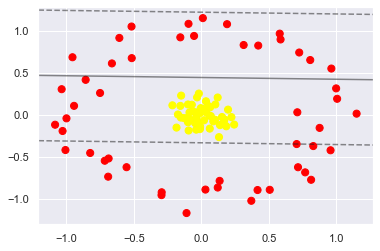

In [257]:
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

어떤 선형적 차별도 이 데이터를 분리할 수 없을 것이 분명하다. 그러나 우리는 깊이: 선형 회귀 분석의 기본 함수 퇴행에서 교훈을 얻을 수 있고, 선형 분리가 충분하도록 데이터를 더 높은 차원으로 투영하는 방법에 대해 생각해 볼 수 있다. 예를 들어, 우리가 사용할 수 있는 한 가지 간단한 투영은 중간 덩어리를 중심으로 한 반지름 기반 함수를 계산하는 것이다.

In [260]:
r = np.exp(-(X ** 2).sum(1))

3차원 플롯을 사용하여 이 추가 데이터 치수를 시각화할 수 있다. 이 노트북을 라이브로 실행하는 경우 슬라이더를 사용하여 플롯을 회전할 수 있다.

# 예제: 얼굴 인식
지원 벡터 기계가 작동하는 예로서, 안면 인식 문제를 살펴보자. 우리는 와일드 데이터셋에 있는 라벨 페이스(Labelled Faces)를 사용할 것이다. 그것은 다양한 공공 인물들의 수천 장의 수집된 사진들로 구성되어 있다. 데이터 세트에 대한 페쳐가 Scikit-Learn에 내장되어 있음:

In [262]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


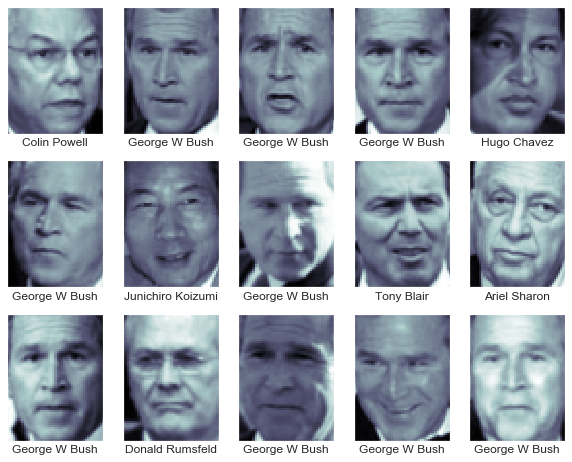

In [266]:
fig, ax = plt.subplots(3, 5, figsize=(10,8))
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

각 이미지에는 [62×47] 또는 거의 3,000 픽셀이 포함되어 있다. 우리는 단순히 각 픽셀 값을 형상으로 사용하여 진행할 수 있지만, 종종 더 의미 있는 형상을 추출하기 위해 일종의 전처리기를 사용하는 것이 더 효과적이다. 여기서는 기본 성분 분석(심층: 주성분 분석 참조)을 사용하여 지원 벡터 기계 분류기에 공급할 150개의 기본 성분을 추출할 것이다. 우리는 전처리기와 분류기를 하나의 파이프라인으로 포장함으로써 이것을 가장 직접적으로 할 수 있다.

In [286]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

pca = PCA(n_components = 150, whiten = True , random_state =42)
svc = SVC(kernel='rbf' , class_weight = 'balanced')
model = make_pipeline(pca, svc)

In [287]:
from sklearn.model_selection import train_test_split

X_train,X_test, Y_train,Y_test = train_test_split(faces.data, faces.target, random_state =42, test_size= 0.3)

마지막으로 그리드 검색 교차 검증을 사용해 모수의 조합을 탐색할 수 있음. 여기서는 마진의 강도를 제어하는 C와 방사형 기저 함수 커널으 ㅣ크기를 제어하는 gamma를 조정해 최적의 모델을 결정

### (그리드 검색 교차 검증)

In [291]:
from sklearn.model_selection import GridSearchCV

param_grid = {'svc__C': [1,5,10,50], 'svc__gamma': [0.0001,0.0005,0.001,0.005]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(X_train,Y_train)

print(grid.best_params_)

Wall time: 33.8 s
{'svc__C': 5, 'svc__gamma': 0.001}


최적의 값은 그리드의 중앙에 위치. 이 값이 가장자리에 위치한다면 그리드를 확장해서 진짜 최적값을 구함. ㅇ

이제 이 교차 검증된 모델을 사용해 모델이 아직 본 적 없는 시험 데이터의 레이블을 예측

In [292]:
model = grid.best_estimator_

yfit = model.predict(X_test)

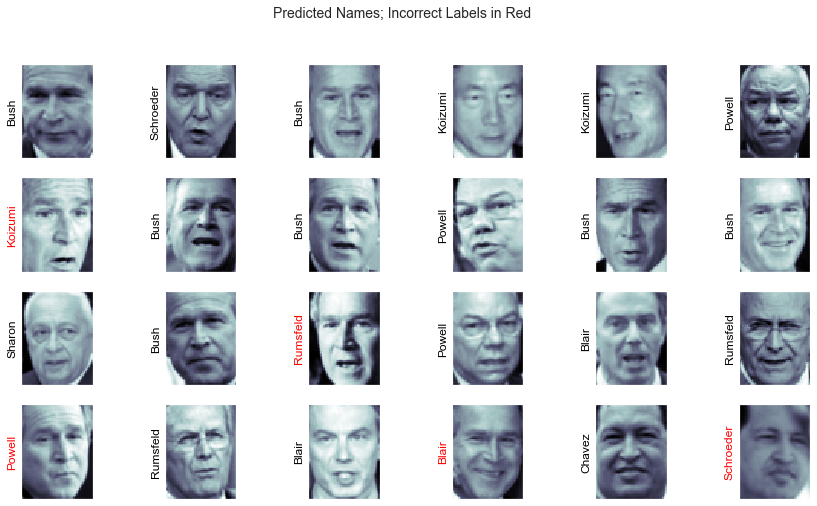

In [308]:
fig, ax = plt.subplots(4, 6, figsize = (15,8))
for i, axi in enumerate(ax.flat):
    axi.imshow(X_test[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == Y_test[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14);

In [300]:
yfit.shape

(405,)

In [311]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, yfit,
                            target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.68      0.88      0.77        17
     Colin Powell       0.80      0.86      0.83        84
  Donald Rumsfeld       0.67      0.89      0.76        36
    George W Bush       0.91      0.77      0.83       146
Gerhard Schroeder       0.70      0.75      0.72        28
      Hugo Chavez       0.89      0.63      0.74        27
Junichiro Koizumi       0.79      0.94      0.86        16
       Tony Blair       0.72      0.76      0.74        51

         accuracy                           0.80       405
        macro avg       0.77      0.81      0.78       405
     weighted avg       0.81      0.80      0.80       405



In [312]:
from sklearn.metrics import classification_report

print(classification_report(Y_test,yfit,target_names= faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.68      0.88      0.77        17
     Colin Powell       0.80      0.86      0.83        84
  Donald Rumsfeld       0.67      0.89      0.76        36
    George W Bush       0.91      0.77      0.83       146
Gerhard Schroeder       0.70      0.75      0.72        28
      Hugo Chavez       0.89      0.63      0.74        27
Junichiro Koizumi       0.79      0.94      0.86        16
       Tony Blair       0.72      0.76      0.74        51

         accuracy                           0.80       405
        macro avg       0.77      0.81      0.78       405
     weighted avg       0.81      0.80      0.80       405



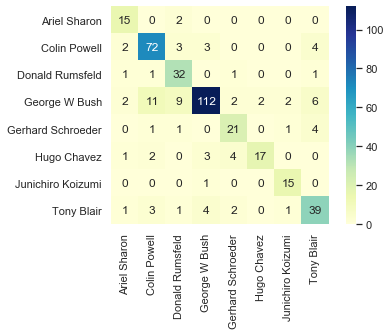

In [328]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(Y_test,yfit)
import seaborn as sns
sns.heatmap(mat, annot=True, cbar=True,square=True,fmt='d', xticklabels=faces.target_names,yticklabels=faces.target_names,cmap='YlGnBu')

plt.show()



In [327]:
sns.heatmap?

이 오차 행렬을 통해 추정기가 어느 레이블을 혼동할 가능성이 높은지 알 수 있다.

사진이 그리드에 들어맞게 깔끔하게 재단되지 않은 실제 안면 인식 작업에서 얼굴 분류 기법의 유일한 차이점은 특징을 선택하는 데 있다. 이때는 얼굴을 찾고 픽셀과 무관한 특징을 추출하기 위해 더 정교한 알고리즘을 사용해야 한다. 이러한 응용에 좋은 방법 중 하나는 OpenCV를 사용하는 것이다. OpenCV는 일반적으로 이미지, 그중에서도 특히 얼굴에 대해 최신 특징 추출 도구를 미리 훈련시켜 두었다.